In [1]:
import pandas as pd
import numpy as np


In [3]:
#loading the train and test files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [4]:
# checking the shape of both files just to confirm they loaded correctly
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# taking a quick look at the training data
train.head()

Train shape: (614, 13)
Test shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# checking how many missing values are there in each column
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# filling Gender column with the most frequent value
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

# filling Married column with the most common entry
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

# filling Dependents with mode value (most repeated)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

# filling Self_Employed the same way (mode)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

# filling LoanAmount using the median (better for skewed distributions)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Loan_Amount_Term also gets its most frequent value
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

# Credit_History is important for prediction, so filling it with mode
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

# finally, checking again if anything is still missing
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# checking which columns are object type (basically categorical/text)
train.select_dtypes(include='object').columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# mapping categorical values to numeric (so ML models can understand them)

# Gender: Male = 1, Female = 0
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})

# Married: Yes = 1, No = 0
train['Married'] = train['Married'].map({'Yes': 1, 'No': 0})

# Dependents: convert '3+' to 3, then to int
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(int)

# Education: Graduate = 1, Not Graduate = 0
train['Education'] = train['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Self_Employed: Yes = 1, No = 0
train['Self_Employed'] = train['Self_Employed'].map({'Yes': 1, 'No': 0})

# Property_Area: Rural = 0, Semiurban = 1, Urban = 2
train['Property_Area'] = train['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# Loan_Status (our target): Y = 1 (Approved), N = 0 (Not Approved)
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})


In [10]:
# checking if everything looks clean and numeric now
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [12]:
# these libraries help us make graphs
import matplotlib.pyplot as plt
import seaborn as sns

# this just makes our graphs look a little nicer
sns.set_style("whitegrid")


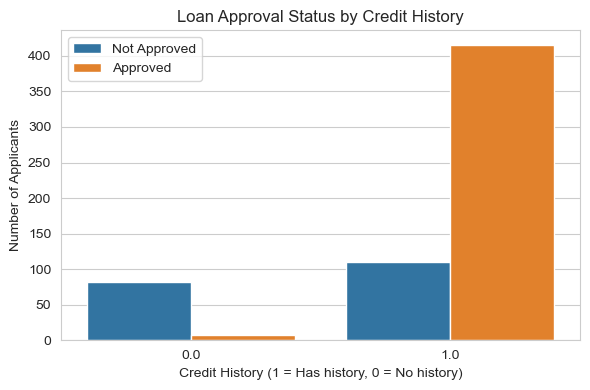

In [13]:
# checking how credit history affects loan approval rate

plt.figure(figsize=(6,4))  # set the figure size
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)  # plot bars split by loan status
plt.title("Loan Approval Status by Credit History")  # add title
plt.xlabel("Credit History (1 = Has history, 0 = No history)")
plt.ylabel("Number of Applicants")
plt.legend(["Not Approved", "Approved"])
plt.tight_layout()
plt.show()


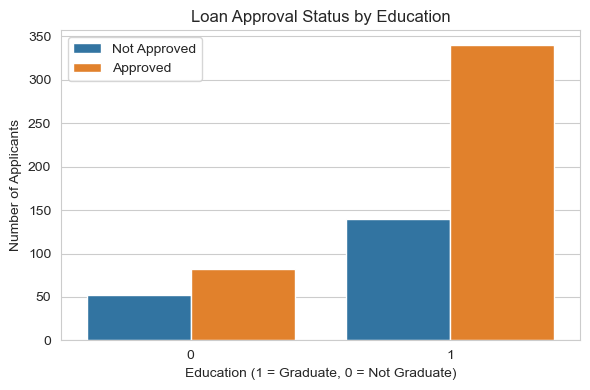

In [14]:
# let’s see if graduates get approved more than non-graduates

plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=train)
plt.title("Loan Approval Status by Education")
plt.xlabel("Education (1 = Graduate, 0 = Not Graduate)")
plt.ylabel("Number of Applicants")
plt.legend(["Not Approved", "Approved"])
plt.tight_layout()
plt.show()


C:\Users\reli\AppData\Local\Temp\ipykernel_3248\3568951358.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")


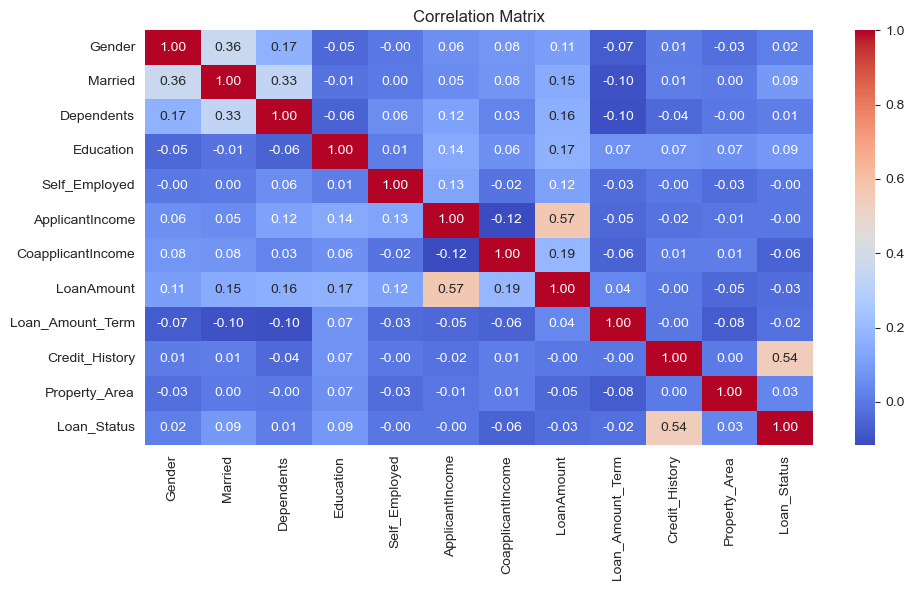

In [15]:
# heatmap to check correlations between features and Loan_Status

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [16]:
# dropping Loan_ID because it's just an identifier (not useful for prediction)
train.drop('Loan_ID', axis=1, inplace=True)

# separating features (X) and target (y)
X = train.drop('Loan_Status', axis=1)  # all columns except the target
y = train['Loan_Status']               # our target column


In [21]:
from sklearn.model_selection import train_test_split

# splitting the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# importing logistic regression model and accuracy function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# creating the model (just like making a calculator, not using it yet)
log_model = LogisticRegression(max_iter=1000)  # max_iter is to avoid warning for convergence

# training the model on our training data (X_train and y_train)
log_model.fit(X_train, y_train)

# using the trained model to predict the test data
y_pred = log_model.predict(X_test)

# checking how accurate our predictions are
accuracy = accuracy_score(y_test, y_pred)

# printing the accuracy result
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7886178861788617


In [22]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [23]:
# Fill missing values using same logic as train.csv
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)


In [24]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
# Convert '3+' to 3 for Dependents
test['Dependents'] = test['Dependents'].replace('3+', 3).astype(int)

# Encoding categorical variables using same mappings as train
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'Yes': 1, 'No': 0})
test['Education'] = test['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes': 1, 'No': 0})
test['Property_Area'] = test['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})


In [26]:
# Save Loan_ID for final output
loan_ids = test['Loan_ID']

# Now drop it from features
test.drop('Loan_ID', axis=1, inplace=True)


In [27]:
# predict on the cleaned test data using your trained model
test_preds = log_model.predict(test)

# preview the first few predictions
print(test_preds[:10])


[1 1 1 1 1 1 1 0 1 1]


In [29]:
# load sample_submission just to get the structure
submission = pd.read_csv("sample_submission.csv")

# update Loan_ID column (we saved this earlier from test.csv)
submission['Loan_ID'] = loan_ids

# convert predictions from 1/0 back to Y/N
submission['Loan_Status'] = ['Y' if pred == 1 else 'N' for pred in test_preds]

# preview the first few rows
submission.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [30]:
# save the final submission file
submission.to_csv("final_submission.csv", index=False)

print("Submission file saved as final_submission.csv")


Submission file saved as final_submission.csv
